## The PDF
Plot the PDF of the binomial distribution the random variable $X \sim B(10,5)$.

[1] 0.0009765625 0.0097656250 0.0439453125 0.1171875000 0.2050781250
 [6] 0.2460937500 0.2050781250 0.1171875000 0.0439453125 0.0097656250
[11] 0.0009765625

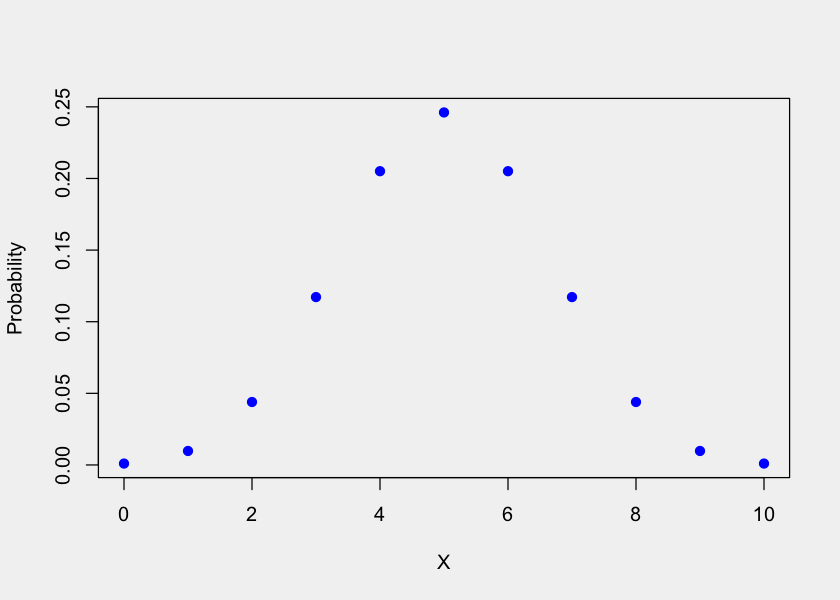

In [1]:
if ( ! exists("options_org")) {
    options_org <- options()
}

options(repr.plot.width=7, repr.plot.height=5)
n = 10
p = .5

x = seq(0, n)
px = dbinom(x, n, p)
px
par(bg = 'gray95') 
plot(x, px, pch=19, col='blue', xlab='X', ylab='Probability')

## The Distribution
Sample data for a random variable $X \sim B(n, p)$ and:
- Approximate $P(X \ge k)$ and $P(X < n - k)$ for $0 \le k \le n$.
- Plot the histogram of the distribution of the sampling data.

In [2]:
n=10
n_samples = 20
n_repeats = 100
sampling_proportion_u = sampling_proportion_l = rep(NA, n_repeats)
k = 10 # n*p = .5

cat('(n_samples, n, p) -> (', n_samples, ',', n, ',', p, ')\n\n')

for (i in 1:n_repeats) {
    rx = sort(rbinom(n_samples, n, p))
    sampling_proportion_u[i] = sum(rx >= k) / n_samples
    sampling_proportion_l[i] = sum(rx < n - k) / n_samples
    
    if (i <= min(10, n_repeats/2)) {
        cat(rx, ' -> u:', sampling_proportion_u[i], ' (l:' , sampling_proportion_l[i] , ') -> ', sampling_proportion_u[i] * n_samples, '\n')
    }
}
cat('...\n')

cat('P(X >= ', k, '):', mean(sampling_proportion_u), '\n')
cat('P(X < ', k, '):', mean(sampling_proportion_l), '\n')

(n_samples, n, p) -> ( 20 , 10 , 0.5 )

3 3 3 4 4 5 5 5 5 6 6 6 6 6 6 6 7 7 8 9  -> u: 0  (l: 0 ) ->  0 
2 3 3 4 4 4 4 4 5 5 5 5 6 6 6 6 6 6 6 7  -> u: 0  (l: 0 ) ->  0 
1 2 3 3 3 3 4 4 4 4 5 5 5 6 6 6 6 6 6 8  -> u: 0  (l: 0 ) ->  0 
2 2 2 3 3 3 3 3 3 4 4 4 4 5 5 5 5 6 8 8  -> u: 0  (l: 0 ) ->  0 
2 3 4 4 4 4 4 4 5 5 5 5 5 6 6 6 7 7 7 7  -> u: 0  (l: 0 ) ->  0 
2 2 3 3 3 3 4 4 4 4 5 5 6 6 6 8 8 8 8 8  -> u: 0  (l: 0 ) ->  0 
2 2 3 3 4 4 4 5 5 5 5 5 5 6 6 6 7 7 7 7  -> u: 0  (l: 0 ) ->  0 
2 3 3 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 6 7  -> u: 0  (l: 0 ) ->  0 
2 3 3 4 4 4 5 5 5 5 6 6 6 6 6 7 7 7 8 8  -> u: 0  (l: 0 ) ->  0 
2 3 3 3 4 4 4 4 4 4 5 5 5 5 5 6 6 7 7 8  -> u: 0  (l: 0 ) ->  0 
...
P(X >=  10 ): 5e-04 
P(X <  10 ): 0 


## Effect of Sample Size
Keep $p$, $n$ and $n\_repeats$ fixed and try different values for $n\_samples$. Also try different values of $p$ and $n$.

In [3]:
p = .1
n=10
n_repeats = 100
props = c(.2, .5, .8)

plot_hist = function () {
    options(repr.plot.height=12)
    par(mfrow=c(3, 1), bg='gray95')
    layout(mat = matrix(c(1, 2, 3), nrow = 3, ncol = 1))
    
    for (p in props) {
        pc = rep(NA, n)
        sampling_proportions = matrix( rep(NA, (n + 1) * n_repeats), ncol=(n+1))

        for (k in 0:n) {
            for (i in 1:n_repeats) {
                rx = sort(rbinom(n_samples, n, p))
                sampling_proportions[, k+1][i] = sum(rx <= k) / n_samples
            }
        }

        plot(0:n, sampling_proportions[1, ], xlab='X', ylab='Probability', main=paste('n=', n, ', n_repeats=', n_repeats, ', p=', p))
        points(0:n, sampling_proportions[2, ], col='red', type='l', lwd=3)
        points(0:n, sampling_proportions[3, ], col=rgb(.5, .2, 1, .5), type='l', pch=16, lwd=3)
        points(0:n, sampling_proportions[4, ], col=rgb(.5, .2, 1, .7), type='l', pch=16, lwd=3)
        points(0:n, sampling_proportions[5, ], col='lightblue', type='l', pch=16, lwd=3)
    }
}

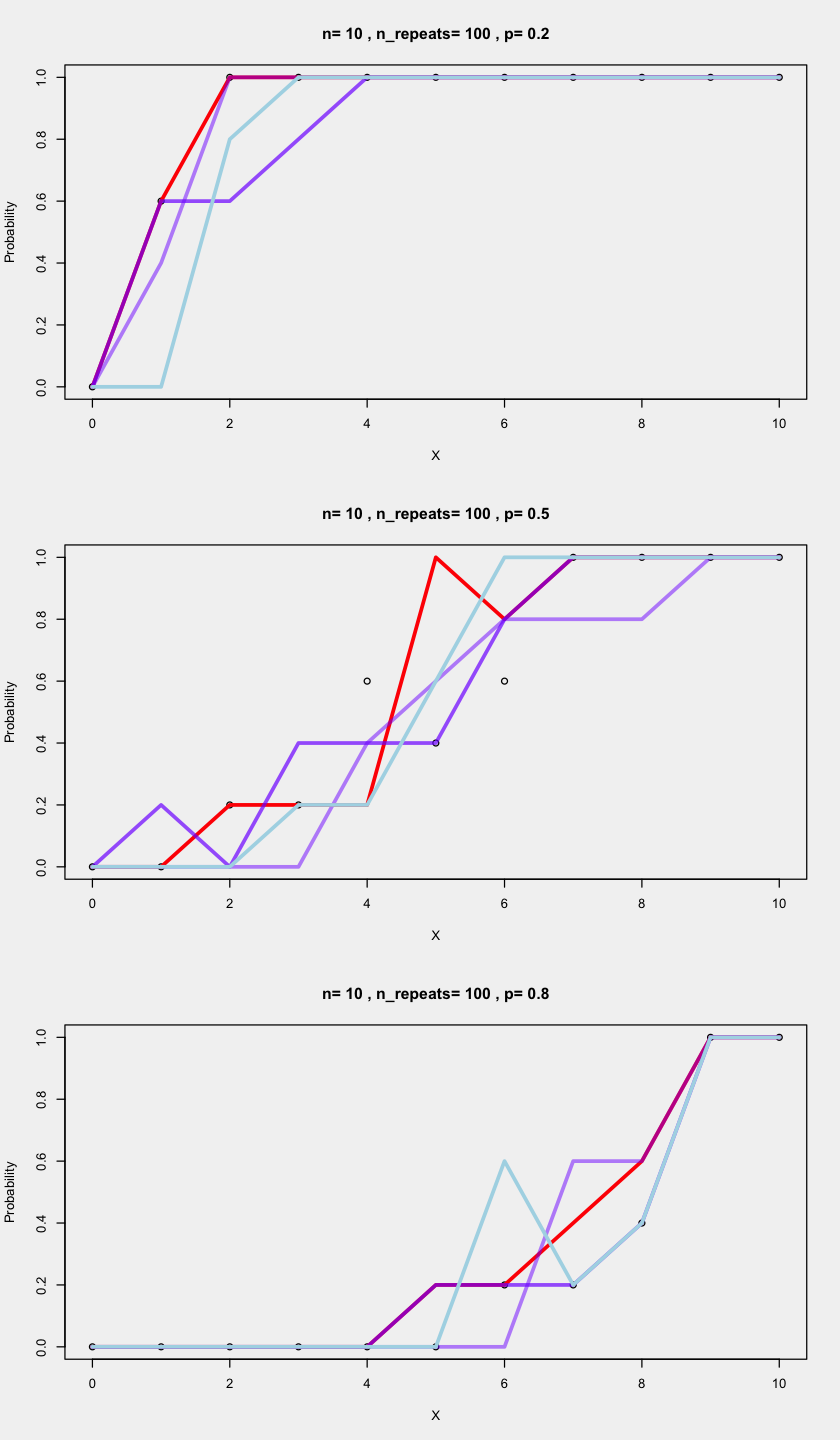

In [4]:
# small sample size
n_samples = 5

plot_hist()

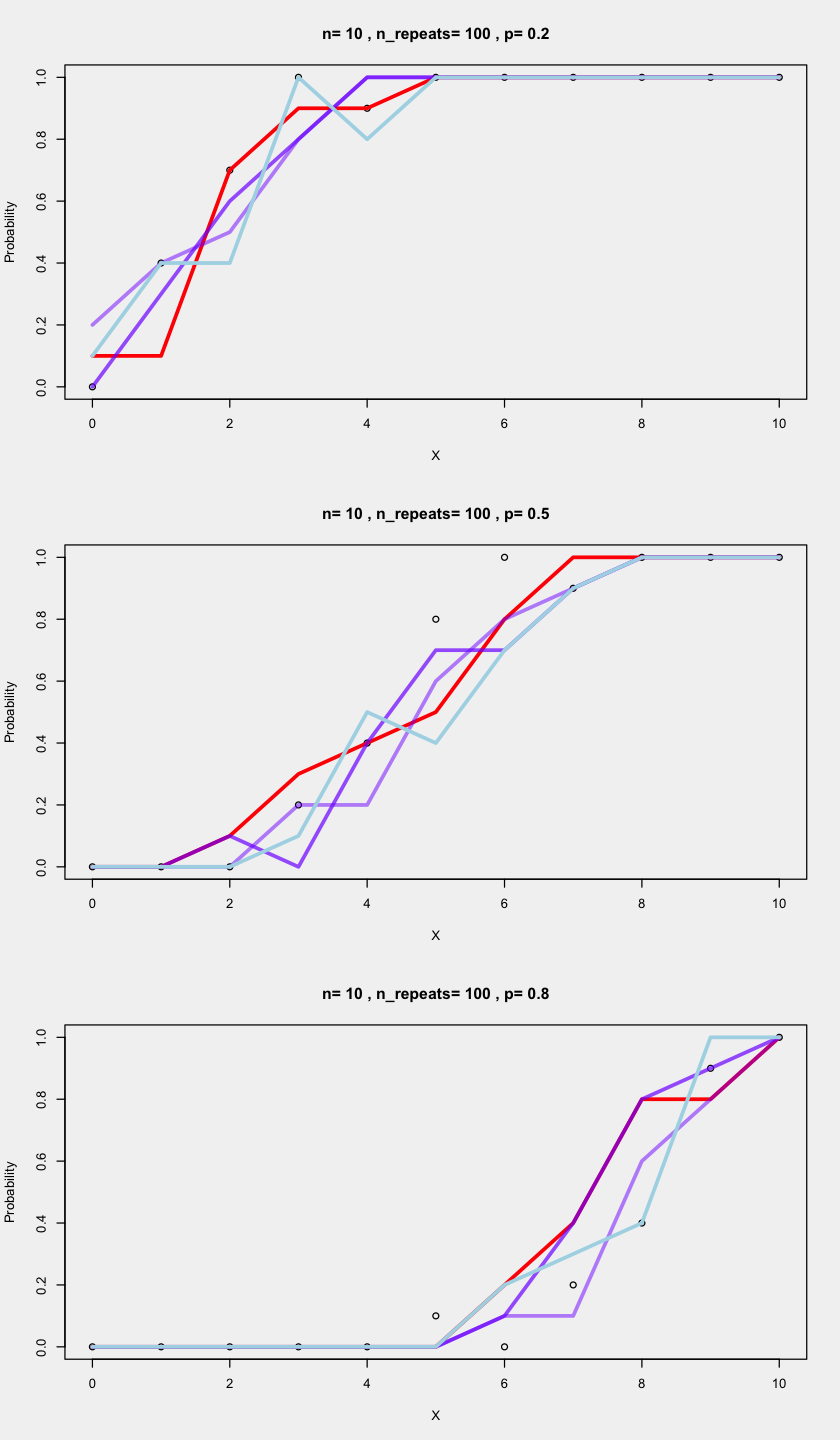

In [5]:
# a little larger
n_samples = 10
plot_hist()

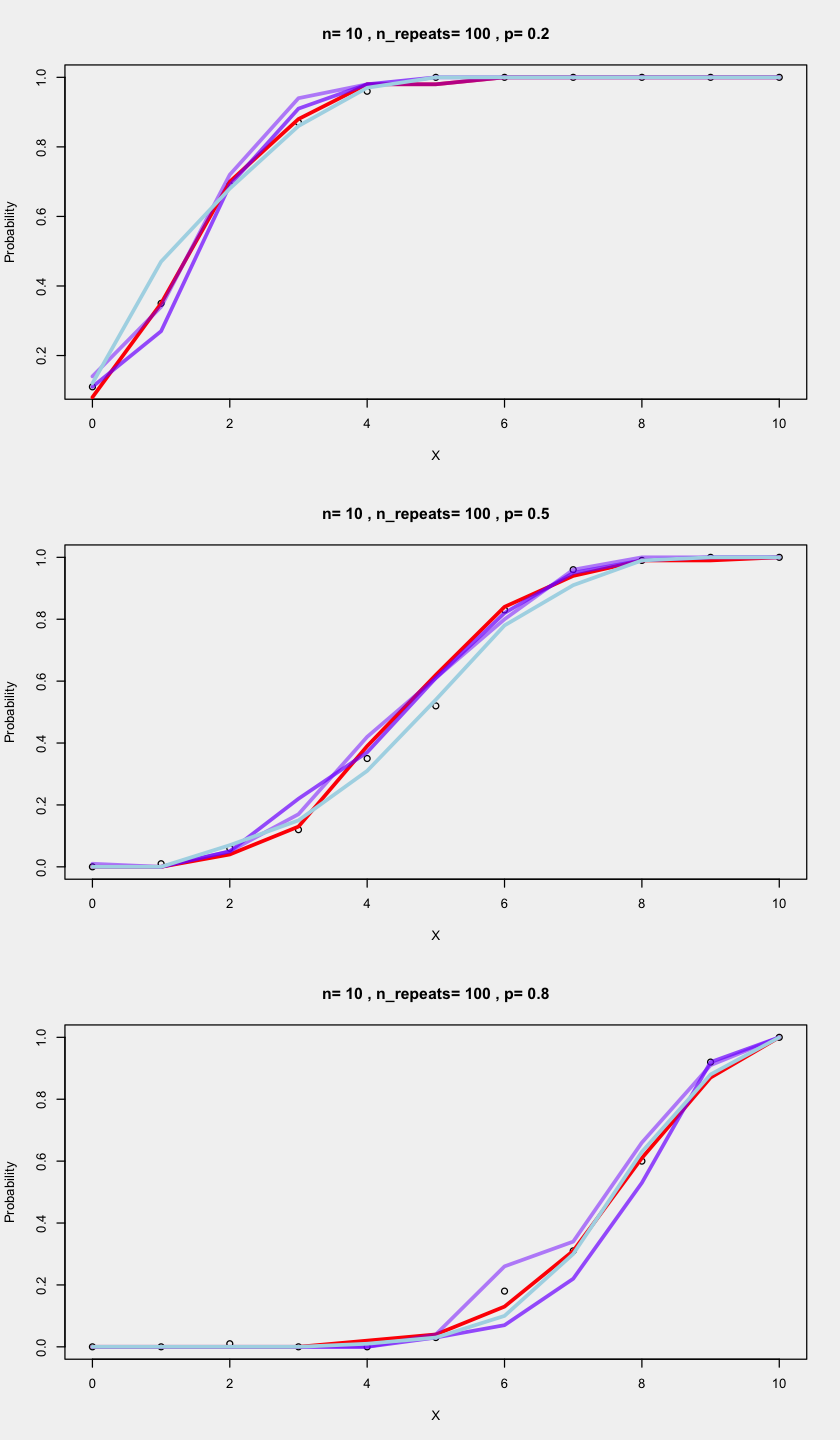

In [6]:
# relative large
n_samples = 100
plot_hist()

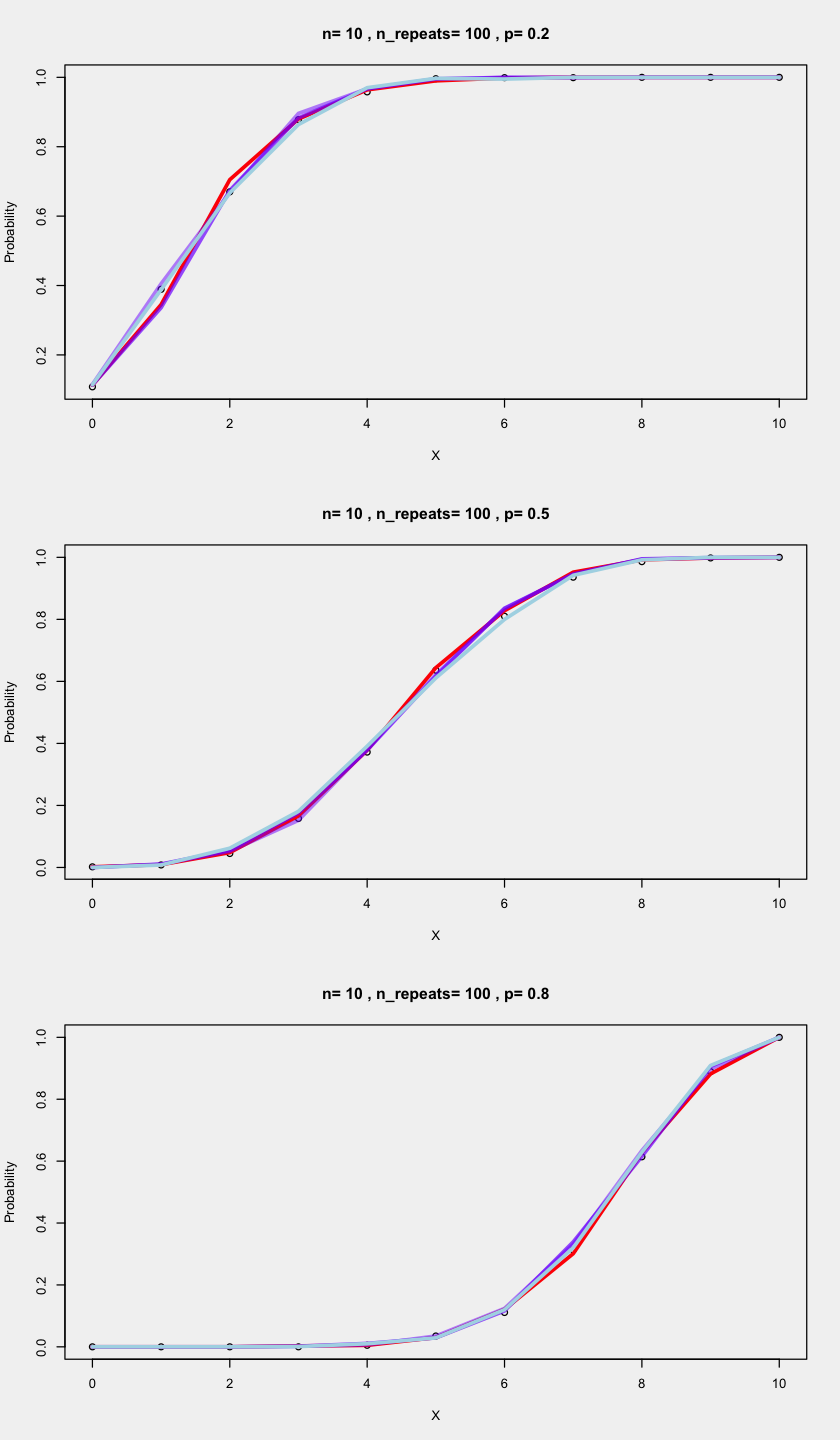

In [7]:
# quite large
n_samples = 1000
plot_hist()

## Data Inspection

### Means of Sampling Proprotions

In [8]:
n=20
p=.5
n_samples = 1000

pc = rep(NA, n)
sampling_proportions = matrix( rep(NA, (n + 1) * n_repeats), ncol=(n+1))

cat('(n_samples, n, p) -> (', n_samples, ',', n, ',', p, ')\n\n')

for (k in 0:n) {
    for (i in 1:n_repeats) {
        rx = sort(rbinom(n_samples, n, p))
        sampling_proportions[, k+1][i] = round(sum(rx <= k) / n_samples, digits=4)
    }
}
cat('Average proportions for different values of k from 0 to 10:')
colMeans(sampling_proportions)

(n_samples, n, p) -> ( 1000 , 20 , 0.5 )

Average proportions for different values of k from 0 to 10:

[1] 0.00000 0.00002 0.00019 0.00143 0.00543 0.02082 0.05839 0.13196 0.25062
[10] 0.41414 0.58893 0.74634 0.86592 0.94270 0.97910 0.99442 0.99889 0.99985
[19] 0.99999 1.00000 1.00000

### Randomness in Sampling

In [9]:
# Print the first $10$ or $n\_repeats$ (if $n\_repeats < 10$) rows in simulated data.
i=min(10, n_repeats)
sampling_proportions[1:i,]

0,0,0.000,0.001,0.008,0.029,0.053,0.118,0.247,0.416,...,0.755,0.853,0.937,0.987,0.994,0.999,1,1,1,1
0,0,0.000,0.001,0.006,0.024,0.064,0.132,0.248,0.427,...,0.773,0.860,0.936,0.974,0.996,0.998,1,1,1,1
0,0,0.000,0.001,0.007,0.023,0.060,0.146,0.241,0.431,...,0.752,0.851,0.944,0.981,0.994,0.999,1,1,1,1
0,0,0.000,0.001,0.003,0.012,0.052,0.130,0.252,0.388,...,0.766,0.882,0.953,0.971,0.997,0.999,1,1,1,1
0,0,0.000,0.001,0.004,0.027,0.050,0.143,0.261,0.431,...,0.739,0.869,0.945,0.982,0.993,1.000,1,1,1,1
0,0,0.000,0.002,0.010,0.019,0.058,0.139,0.257,0.403,...,0.738,0.860,0.949,0.983,0.995,0.999,1,1,1,1
0,0,0.001,0.001,0.003,0.024,0.059,0.135,0.241,0.426,...,0.762,0.861,0.944,0.977,0.993,1.000,1,1,1,1
0,0,0.001,0.002,0.011,0.025,0.057,0.133,0.244,0.431,...,0.741,0.866,0.943,0.976,0.992,1.000,1,1,1,1
0,0,0.000,0.000,0.006,0.024,0.060,0.129,0.234,0.407,...,0.728,0.868,0.930,0.984,0.998,0.999,1,1,1,1
0,0,0.001,0.003,0.003,0.027,0.057,0.145,0.231,0.445,...,0.736,0.852,0.956,0.978,0.995,1.000,1,1,1,1
